# Simulação de Trajetória - Projeto Calisto v53

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext snakeviz
from rocketpyAlpha import *
%matplotlib notebook
plt.rcParams.update({'figure.max_open_warning': 0})

## Dados de Lançamento e Climáticos

Gravity Details
Acceleration of Gravity: 9.8 m/s2

Rail Details
Rail Length: 5.2 m

Spacetime Details
Date:  2016-06-20 18:00:00
Latitude:  32.990254
Longitude:  -106.974998

Wind Plots


<IPython.core.display.Javascript object>


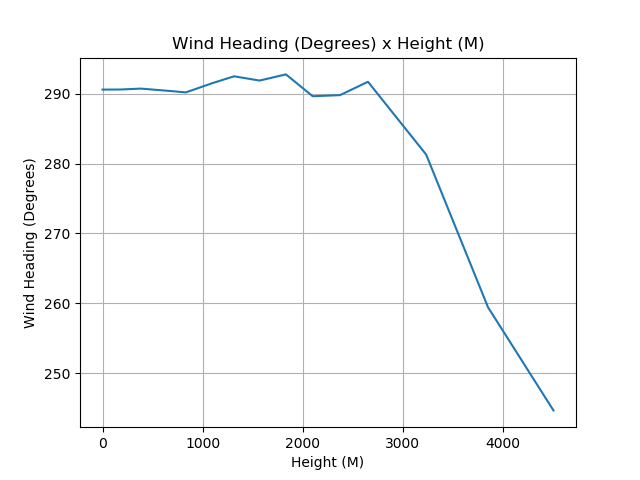

<IPython.core.display.Javascript object>


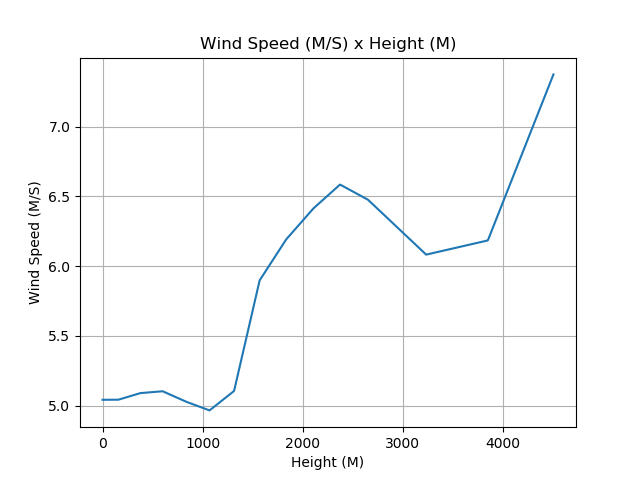

<IPython.core.display.Javascript object>


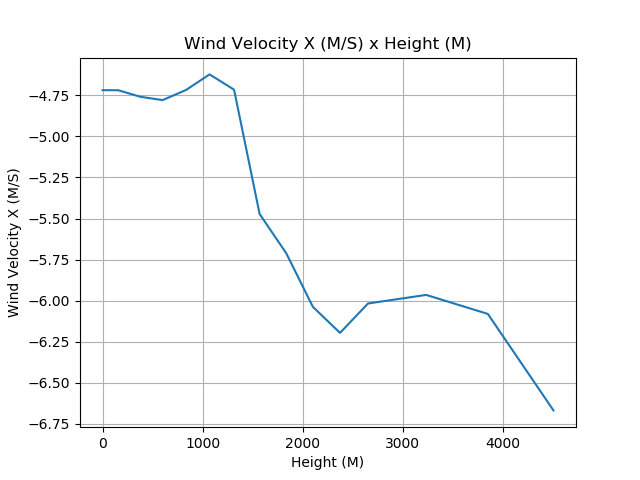

<IPython.core.display.Javascript object>


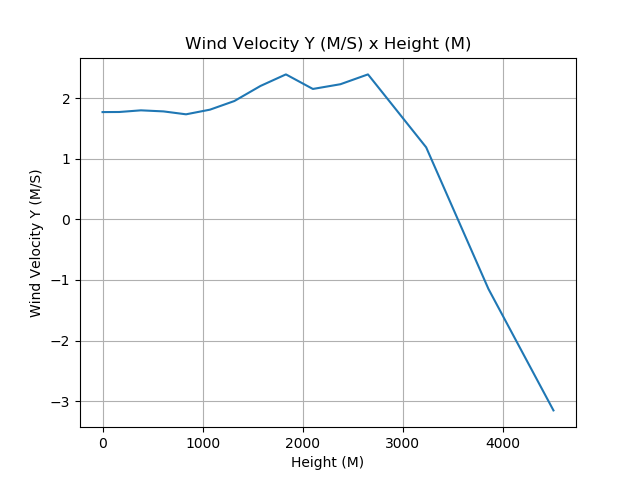


 Standard Atmosphere Plots


<IPython.core.display.Javascript object>


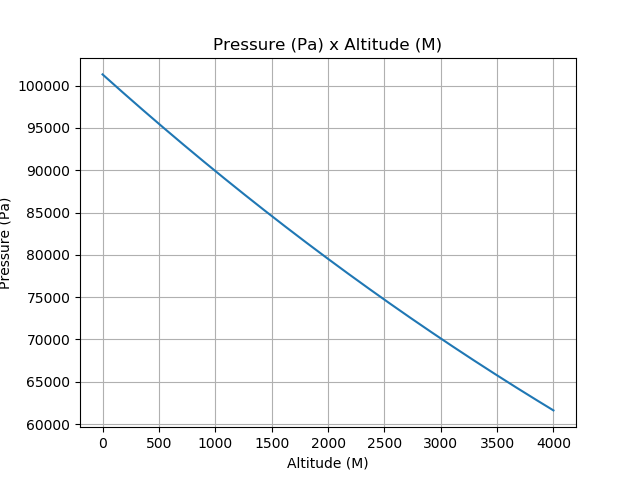

<IPython.core.display.Javascript object>


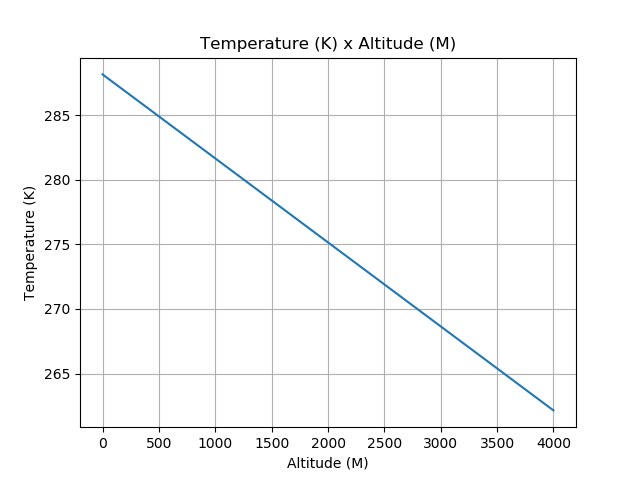

<IPython.core.display.Javascript object>


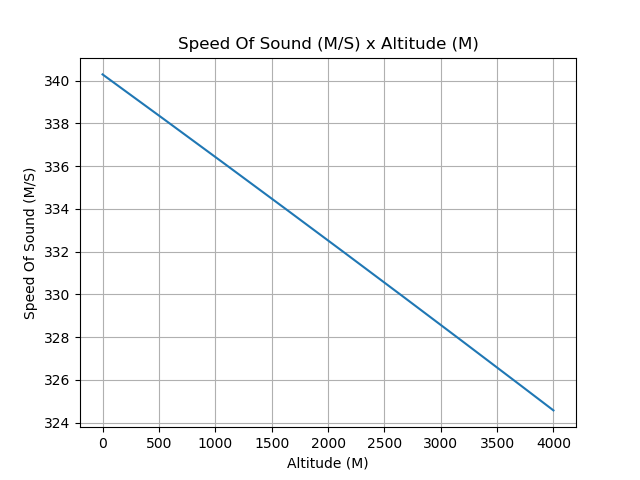

<IPython.core.display.Javascript object>


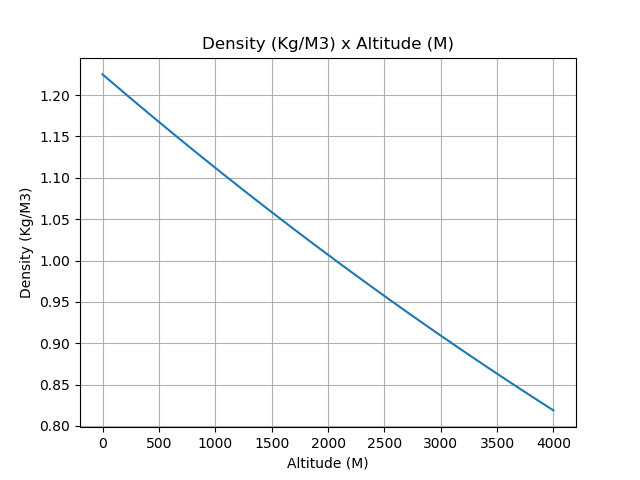

In [2]:
Env = Environment(railLength=5.2,
                  gravity=9.8,
                  windData="../data/weather/SpacePort.nc",
                  location=(32.990254, -106.974998),
                  date=(2016, 6, 20, 18))
Env.allInfo()

## Dados do Motor Cesaroni Pro75M1670

Nozzle Details
Nozzle Radius: 0.033 m
Nozzle Throat Radius: 0.011 m

Grain Details
Number of Grains: 5
Grain Spacing: 0.005 m
Grain Density: 1815 kg/m3
Grain Outer Radius: 0.033 m
Grain Inner Radius: 0.015 m
Grain Height: 0.12 m
Grain Volume: 0.000 m3
Grain Mass: 0.591 kg

Motor Details
Total Burning Time: 3.9 s
Total Propellant Mass: 2.956 kg
Propellant Exhaust Velocity: 2038.745 m/s
Average Thrust: 1545.218 N
Maximum Thrust: 2200.0 N at 0.15 s after ignition.
Total Impulse: 6026.350 Ns

Plots


<IPython.core.display.Javascript object>


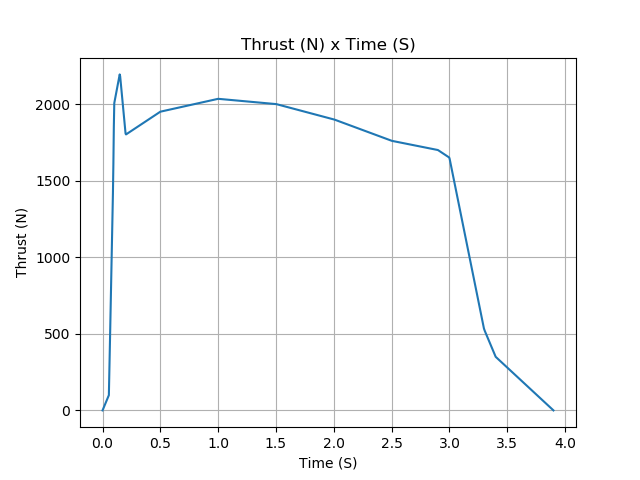

<IPython.core.display.Javascript object>


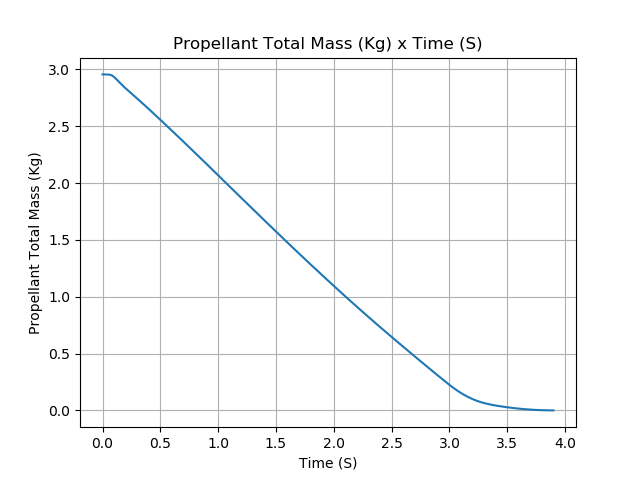

<IPython.core.display.Javascript object>


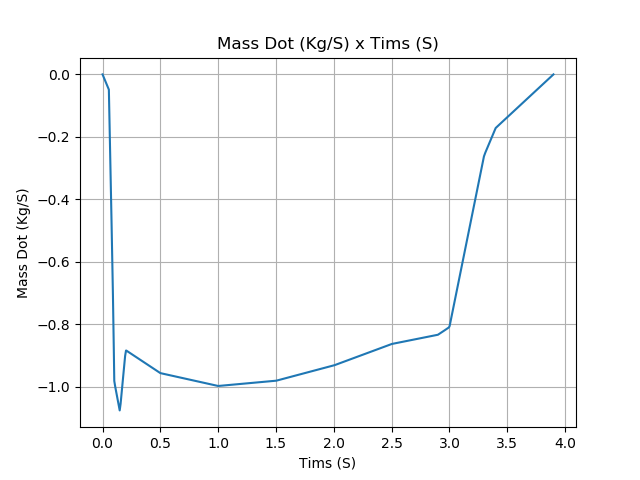

<IPython.core.display.Javascript object>


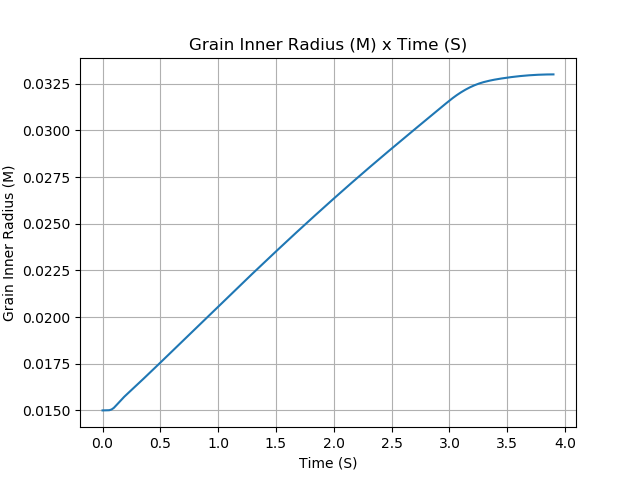

<IPython.core.display.Javascript object>


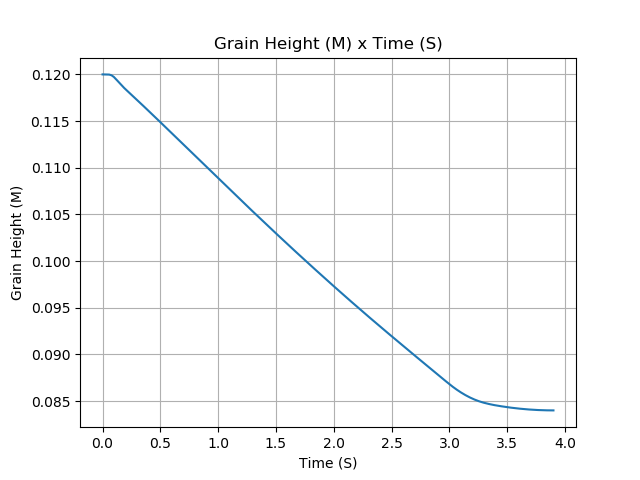

<IPython.core.display.Javascript object>


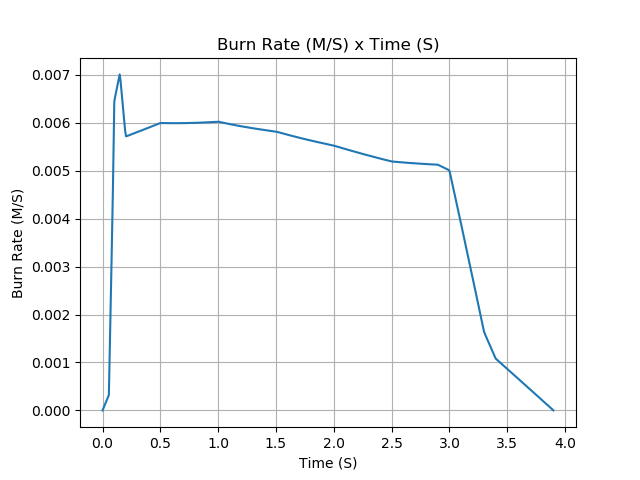

<IPython.core.display.Javascript object>


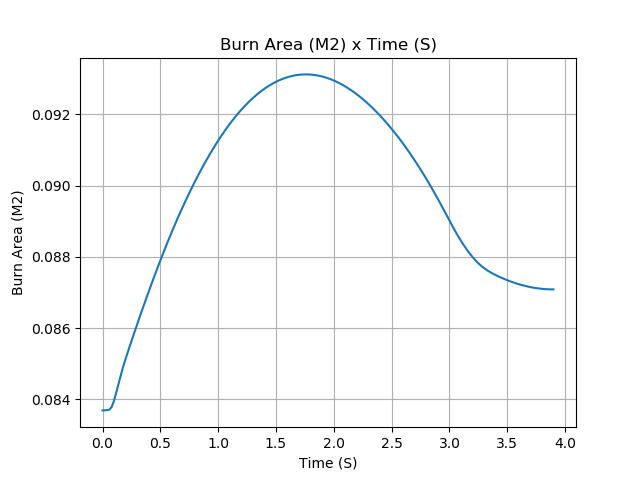

<IPython.core.display.Javascript object>


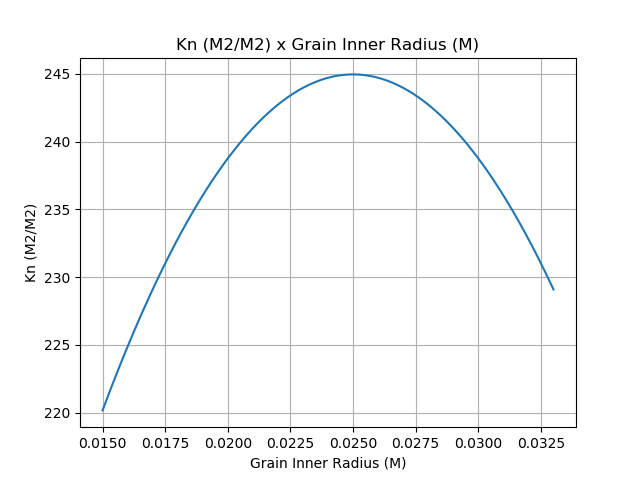

<IPython.core.display.Javascript object>


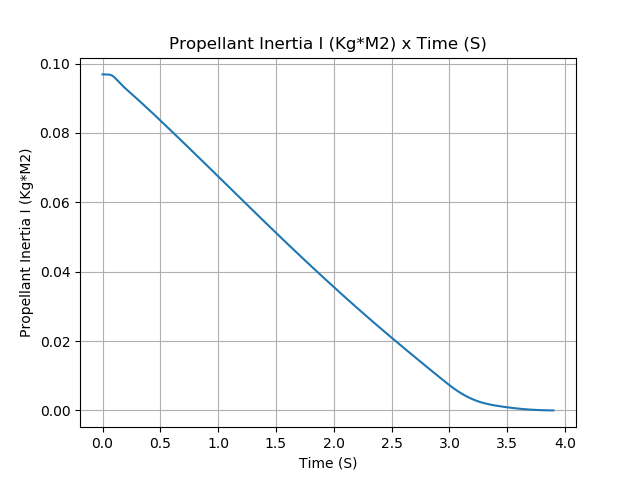

<IPython.core.display.Javascript object>


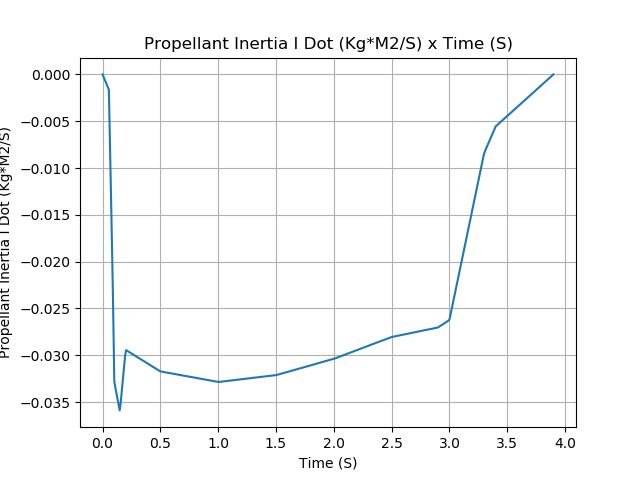

<IPython.core.display.Javascript object>


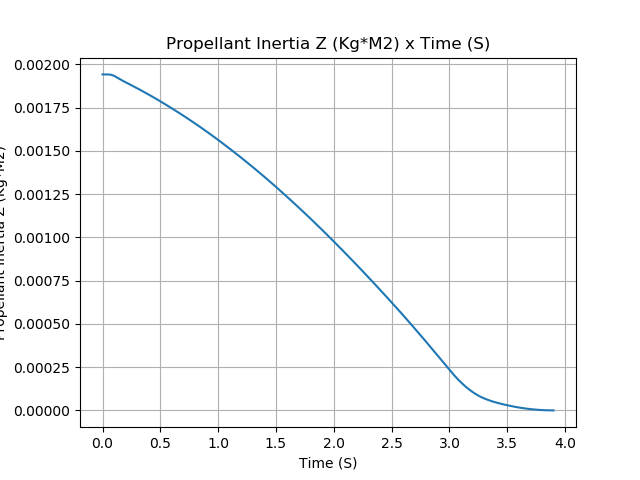

<IPython.core.display.Javascript object>


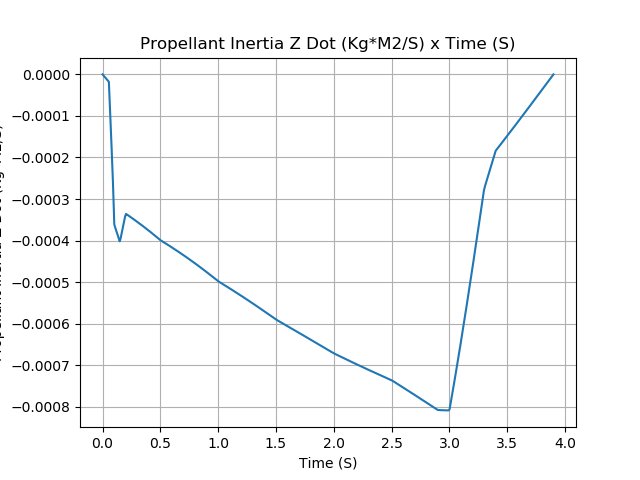

In [3]:
Pro75M1670 = Motor(thrustSource="../data/motors/Cesaroni_M1670.eng",
                   burnOut=3.9,
                   grainNumber=5,
                   grainSeparation=5/1000,
                   grainDensity=1815,
                   grainOuterRadius=33/1000,
                   grainInitialInnerRadius=15/1000,
                   grainInitialHeight=120/1000,
                   nozzleRadius=33/1000,
                   throatRadius=11/1000,
                   interpolationMethod='linear')
Pro75M1670.info()

## Algorítimo do Thomas para Detecção de Events

In [4]:
import SisRec

sisRecDrogue = SisRec.SisRecSt(0.9, 0.2)
sisRecMain = SisRec.SisRecSt(0.9, 0.2)

def drogueTrigger(p, y):
    return True if sisRecDrogue.update(p/100000) == 2 else False

def mainTrigger(p, y):
    return True if sisRecMain.update(p/100000) == 3 else False

## Dados do Foguete

Inertia Details
Rocket Mass: 16.241 kg (No Propellant)
Rocket Mass: 19.196911961392022 kg (With Propellant)
Inertia I: 6.6 kg*m2
Inertia Z: 0.0351 kg*m2

Geometrical Parameters
Rocket Radius: 0.0635 m
Rocket Frontal Area: 0.012668 m2

Rocket Distances
Rocket Center of Mass - Nozzle Exit Distance: 1.255 m
Rocket Center of Mass - Propellant Center of Mass Distance: 0.85704 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.132 m

Aerodynamic Coponents Parameters
Currently not implemented.

Aerodynamics Lift Coefficient Derivatives
Nose Cone Lift Coefficient Derivative: 2.000/rad
Fins Lift Coefficient Derivative: 5.145/rad
Tail Lift Coefficient Derivative: -1.061/rad

Aerodynamics Center of Pressure
Nose Cone Center of Pressure to CM: 0.999 m
Fins Center of Pressure to CM: -1.105 m
Tail Center of Pressure to CM: -1.223 m
Static Center of Pressure to CM: -0.392 m
Static Margin: 2.051 c

Drogue Parachute
CdS Coefficient: 1.0 m2
Ejection signal trigger: drogueTrigger
Ejection system r

<IPython.core.display.Javascript object>


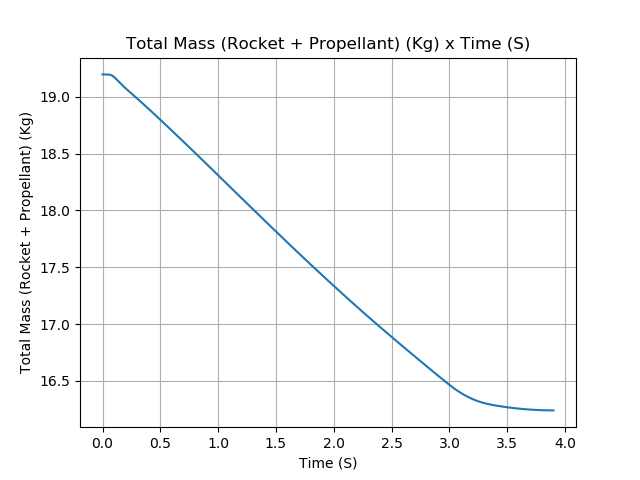

<IPython.core.display.Javascript object>


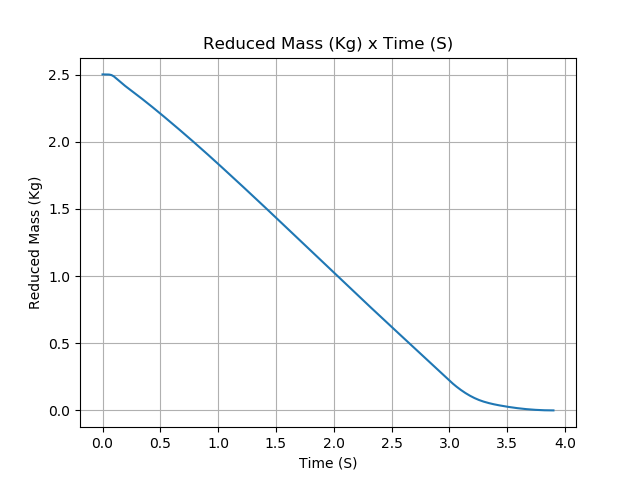


Aerodynamics Plots


<IPython.core.display.Javascript object>


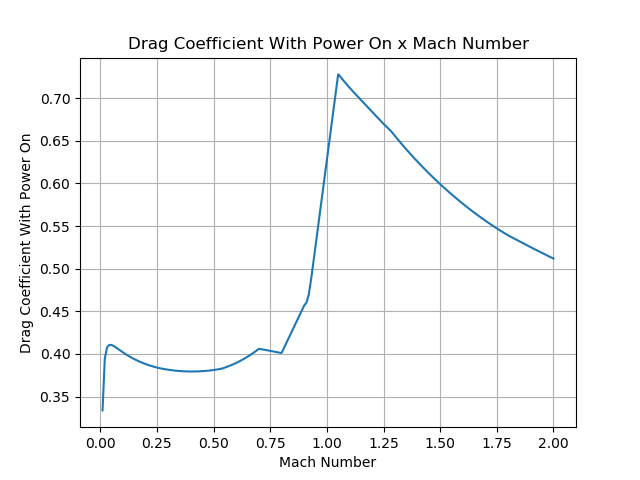

<IPython.core.display.Javascript object>


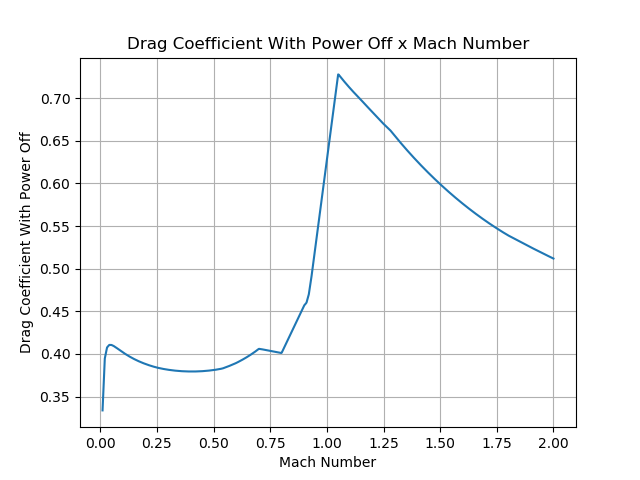

In [5]:
Calisto = Rocket(motor=Pro75M1670,
                 radius=127/2000,
                 mass=19.197-2.956,
                 inertiaI=6.60,
                 inertiaZ=0.0351,
                 distanceRocketNozzle=1.255,
                 distanceRocketPropellant=0.85704,
                 powerOffDrag='../data/calisto/powerOffDragCurve.csv',
                 powerOnDrag='../data/calisto/powerOnDragCurve.csv')

Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

Calisto.addFins(4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956)

Calisto.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)

Calisto.addParachute('Drogue',
                     CdS=1.0,
                     trigger=drogueTrigger, 
                     samplingRate=100,
                     lag=1.5)

Calisto.addParachute('Main',
                     CdS=10.0,
                     trigger=mainTrigger, 
                     samplingRate=100,
                     lag=1.5)

Calisto.info()

## Removendo Itens "Remove Before Flight"

In [6]:
sisRecDrogue.reset()
sisRecDrogue.enable()
sisRecMain.reset()
sisRecMain.enable()

## Simulação da Trajetória e Resultados Previstos


Off Rail Conditions
Rail Departure Time: 0.420 s
Rail Departure Velocity: 30.924 m/s

Apogee
Height: 3151.270 m
Velocity: 18.527 m/s
Time: 25.109 s
Freestream Speed: 21.319 m/s

Events
Drogue Ejection Fired at: 23.800 s
Drogue Fully Ejected at: 25.300 s
Drogue Ejected with Freestream Speed: 21.379 m/s
Drogue Ejected at Height of: 3151.095 m
Main Ejection Fired at: 148.750 s
Main Fully Ejected at: 150.250 s
Main Ejected with Freestream Speed: 17.842 m/s
Main Ejected at Height of: 964.810 m

Impact
X Impact: -1166.941 m
Y Impact: 1047.569 m
Time of Impact: 320.422 s
Velocity at Impact: -5.642 m/s

Maximum Velocity and Acceleration
Velocity: 282.753 m/s
Acceleration: 99.922 m/s2

Trajectory Plots


<IPython.core.display.Javascript object>


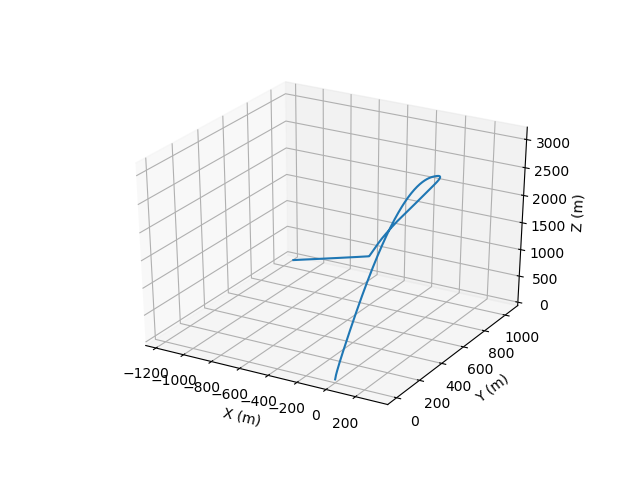

In [7]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0, maxStepSize=0.01, maxTime=600)
TestFlight.info()

## Gráfico Altitude de Apogeu em Função da Massa Sem Propelente

<IPython.core.display.Javascript object>


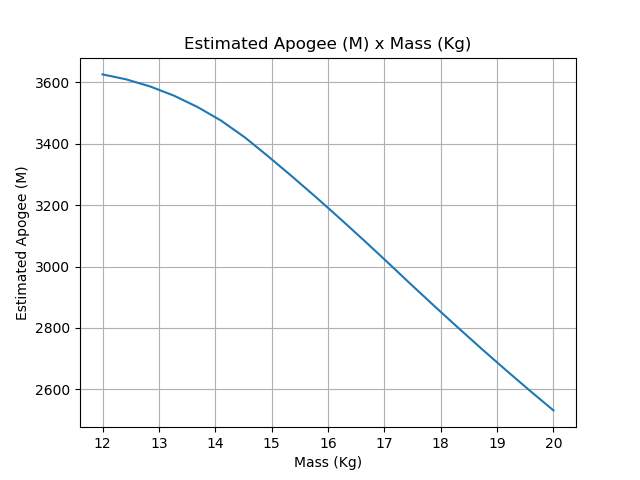

In [8]:
def apogee(mass):
    R = Rocket(motor=Pro75M1670,
                     radius=127/2000,
                     mass=mass,
                     inertiaI=6.60,
                     inertiaZ=0.0351,
                     distanceRocketNozzle=1.255,
                     distanceRocketPropellant=0.85704,
                     powerOffDrag='../data/calisto/powerOffDragCurve.csv',
                     powerOnDrag='../data/calisto/powerOnDragCurve.csv')
    R.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
    R.addFins(4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956)
    R.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)
    TF = Flight(rocket=R, environment=Env, inclination=85, terminateOnApogee=True, heading=0, maxStepSize=0.01, maxTime=600)
    return TF.apogee

apogeebymass = Function(apogee, inputs="Mass (kg)", outputs="Estimated Apogee (m)")
apogeebymass.plot(12,20,20)

## Gráfico da Velocidade de Saída do Trilho em Função da Massa Sem Propelente

<IPython.core.display.Javascript object>


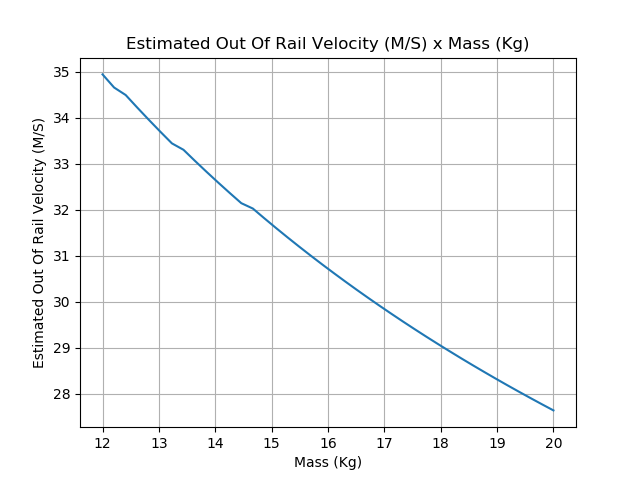

In [9]:
def vel(mass):
    R = Rocket(motor=Pro75M1670,
                     radius=127/2000,
                     mass=mass,
                     inertiaI=6.60,
                     inertiaZ=0.0351,
                     distanceRocketNozzle=1.255,
                     distanceRocketPropellant=0.85704,
                     powerOffDrag='../data/calisto/powerOffDragCurve.csv',
                     powerOnDrag='../data/calisto/powerOnDragCurve.csv')
    R.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)
    R.addFins(4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956)
    R.addTail(topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656)
    TF = Flight(rocket=R, environment=Env, inclination=85, terminateOnApogee=True, heading=0, maxStepSize=0.001, maxTime=600)
    return TF.outOfRailVelocity

velbymass = Function(vel, inputs="Mass (kg)", outputs="Estimated Out Of Rail Velocity (m/s)")
velbymass.plot(12,20,40)